# Current Health Expenditure & Life Expectancy Analysis

This project is an analysis of the Current Health Expenditure Per Capita in US$ and Life Expectancy across multiple countries.

In [667]:
# import dependencies
import pandas as pd
import numpy as np

In [812]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Cleaning and Exploring Data

In [672]:
# read in current health expenditure data set
che = pd.read_csv("data/current_health_expenditure.csv")
che.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,GHED_CHE_pc_US_SHA2011,Current health expenditure (CHE) per capita in...,numeric,AMR,Americas,Country,CUB,Cuba,Year,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EN,2023-12-05T08:00:00.000Z
1,GHED_CHE_pc_US_SHA2011,Current health expenditure (CHE) per capita in...,numeric,AFR,Africa,Country,GHA,Ghana,Year,2021,...,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,EN,2023-12-05T08:00:00.000Z
2,GHED_CHE_pc_US_SHA2011,Current health expenditure (CHE) per capita in...,numeric,SEAR,South-East Asia,Country,MDV,Maldives,Year,2021,...,NaN,NaN,NaN,NaN,NaN,1038.67,NaN,NaN,EN,2023-12-05T08:00:00.000Z
3,GHED_CHE_pc_US_SHA2011,Current health expenditure (CHE) per capita in...,numeric,EUR,Europe,Country,BGR,Bulgaria,Year,2021,...,NaN,NaN,NaN,NaN,NaN,1040.02,NaN,NaN,EN,2023-12-05T08:00:00.000Z
4,GHED_CHE_pc_US_SHA2011,Current health expenditure (CHE) per capita in...,numeric,AMR,Americas,Country,ARG,Argentina,Year,2021,...,NaN,NaN,NaN,NaN,NaN,1044.77,NaN,NaN,EN,2023-12-05T08:00:00.000Z


In [674]:
print(che.isnull().sum())

IndicatorCode                    0
Indicator                        0
ValueType                        0
ParentLocationCode               0
ParentLocation                   0
Location type                    0
SpatialDimValueCode              0
Location                         0
Period type                      0
Period                           0
IsLatestYear                     0
Dim1 type                     4153
Dim1                          4153
Dim1ValueCode                 4153
Dim2 type                     4153
Dim2                          4153
Dim2ValueCode                 4153
Dim3 type                     4153
Dim3                          4153
Dim3ValueCode                 4153
DataSourceDimValueCode        4153
DataSource                    4153
FactValueNumericPrefix        4153
FactValueNumeric                19
FactValueUoM                  4153
FactValueNumericLowPrefix     4153
FactValueNumericLow           4153
FactValueNumericHighPrefix    4153
FactValueNumericHigh

In [676]:
che.drop(columns=['Indicator','IndicatorCode', 'ValueType', 'ParentLocationCode', 'SpatialDimValueCode','Period type','IsLatestYear',
                        'Dim1 type', 'Dim1', 'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type', 'Dim3', 
                        'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource', 'FactValueNumericPrefix', 'FactValueNumeric',
                       'FactValueUoM', 'FactValueNumericLowPrefix', 'FactValueNumericLow', 'FactValueNumericHighPrefix',
                       'FactValueNumericHigh', 'FactValueTranslationID', 'FactComments', 'Language', 'DateModified'], inplace=True)

In [678]:
che.head()

,ParentLocation,Location type,Location,Period,Value
0,Americas,Country,Cuba,2021,NaN
1,Africa,Country,Ghana,2021,100.00
2,South-East Asia,Country,Maldives,2021,1038.67
3,Europe,Country,Bulgaria,2021,1040.02
4,Americas,Country,Argentina,2021,1044.77


In [680]:
che.rename(columns={'ParentLocation': 'Continent', 'Location': 'Country', 'Period':'Year', 'Value': 'CHE'}, inplace=True)

In [682]:
print(che.isnull().sum())

Continent         0
Location type     0
Country           0
Year              0
CHE              19
dtype: int64


In [684]:
che.fillna({'CHE':0}, inplace = True)

In [686]:
print(che.isnull().sum())

Continent        0
Location type    0
Country          0
Year             0
CHE              0
dtype: int64


In [688]:
che.head()

,Continent,Location type,Country,Year,CHE
0,Americas,Country,Cuba,2021,0.00
1,Africa,Country,Ghana,2021,100.00
2,South-East Asia,Country,Maldives,2021,1038.67
3,Europe,Country,Bulgaria,2021,1040.02
4,Americas,Country,Argentina,2021,1044.77


In [690]:
# read in current health expenditure data set
hle = pd.read_csv("data/health_life_expectancy.csv")
hle.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),text,AFR,Africa,Country,LSO,Lesotho,Year,2021,...,NaN,NaN,42.23,NaN,44.08,43.1 [42.2 – 44.1],NaN,NaN,EN,2024-08-02T07:00:00.000Z
1,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),text,AFR,Africa,Country,CAF,Central African Republic,Year,2021,...,NaN,NaN,42.74,NaN,44.97,43.8 [42.7 – 45.0],NaN,NaN,EN,2024-08-02T07:00:00.000Z
2,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),text,AFR,Africa,Country,LSO,Lesotho,Year,2021,...,NaN,NaN,43.66,NaN,45.76,44.6 [43.7 – 45.8],NaN,NaN,EN,2024-08-02T07:00:00.000Z
3,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),text,AFR,Africa,Country,CAF,Central African Republic,Year,2021,...,NaN,NaN,44.26,NaN,46.48,45.4 [44.3 – 46.5],NaN,NaN,EN,2024-08-02T07:00:00.000Z
4,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),text,AFR,Africa,Country,SWZ,Eswatini,Year,2021,...,NaN,NaN,44.85,NaN,46.98,45.8 [44.8 – 47.0],NaN,NaN,EN,2024-08-02T07:00:00.000Z


In [692]:
print(hle.isnull().sum())

IndicatorCode                     0
Indicator                         0
ValueType                         0
ParentLocationCode                0
ParentLocation                    0
Location type                     0
SpatialDimValueCode               0
Location                          0
Period type                       0
Period                            0
IsLatestYear                      0
Dim1 type                         0
Dim1                              0
Dim1ValueCode                     0
Dim2 type                     24420
Dim2                          24420
Dim2ValueCode                 24420
Dim3 type                     24420
Dim3                          24420
Dim3ValueCode                 24420
DataSourceDimValueCode        24420
DataSource                    24420
FactValueNumericPrefix        24420
FactValueNumeric                  0
FactValueUoM                  24420
FactValueNumericLowPrefix     24420
FactValueNumericLow              40
FactValueNumericHighPrefix  

In [694]:
hle.drop(columns=['IndicatorCode','IndicatorCode', 'ValueType', 'ParentLocationCode', 'SpatialDimValueCode','Period type','IsLatestYear',
                        'Dim1 type', 'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type', 'Dim3', 
                        'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource', 'FactValueNumericPrefix', 'Value',
                       'FactValueUoM', 'FactValueNumericLowPrefix', 'FactValueNumericLow', 'FactValueNumericHighPrefix',
                       'FactValueNumericHigh', 'FactValueTranslationID', 'FactComments', 'Language', 'DateModified'], inplace=True)

In [696]:
hle.head()

,Indicator,ParentLocation,Location type,Location,Period,Dim1,FactValueNumeric
0,Healthy life expectancy (HALE) at birth (years),Africa,Country,Lesotho,2021,Male,43.10
1,Healthy life expectancy (HALE) at birth (years),Africa,Country,Central African Republic,2021,Male,43.78
2,Healthy life expectancy (HALE) at birth (years),Africa,Country,Lesotho,2021,Both sexes,44.63
3,Healthy life expectancy (HALE) at birth (years),Africa,Country,Central African Republic,2021,Both sexes,45.43
4,Healthy life expectancy (HALE) at birth (years),Africa,Country,Eswatini,2021,Male,45.79


In [698]:
hle.rename(columns={'ParentLocation': 'Continent', 'Location': 'Country', 'Period':'Year', 'Dim1': 'Gender', 'FactValueNumeric': 'Avg HLE'}, inplace=True)

In [700]:
hle.head()

,Indicator,Continent,Location type,Country,Year,Gender,Avg HLE
0,Healthy life expectancy (HALE) at birth (years),Africa,Country,Lesotho,2021,Male,43.10
1,Healthy life expectancy (HALE) at birth (years),Africa,Country,Central African Republic,2021,Male,43.78
2,Healthy life expectancy (HALE) at birth (years),Africa,Country,Lesotho,2021,Both sexes,44.63
3,Healthy life expectancy (HALE) at birth (years),Africa,Country,Central African Republic,2021,Both sexes,45.43
4,Healthy life expectancy (HALE) at birth (years),Africa,Country,Eswatini,2021,Male,45.79


In [702]:
print(hle.isnull().sum())

Indicator        0
Continent        0
Location type    0
Country          0
Year             0
Gender           0
Avg HLE          0
dtype: int64


In [704]:
hle = hle[hle['Gender'] != 'Male']

In [706]:
hle = hle[hle['Gender'] != 'Female']

In [708]:
hle = hle[hle['Indicator'] != 'Healthy life expectancy (HALE) at age 60 (years)']

In [710]:
hle.head()

,Indicator,Continent,Location type,Country,Year,Gender,Avg HLE
2,Healthy life expectancy (HALE) at birth (years),Africa,Country,Lesotho,2021,Both sexes,44.63
3,Healthy life expectancy (HALE) at birth (years),Africa,Country,Central African Republic,2021,Both sexes,45.43
8,Healthy life expectancy (HALE) at birth (years),Eastern Mediterranean,Country,Somalia,2021,Both sexes,47.42
9,Healthy life expectancy (HALE) at birth (years),Africa,Country,Eswatini,2021,Both sexes,47.47
15,Healthy life expectancy (HALE) at birth (years),Africa,Country,Mozambique,2021,Both sexes,49.72


In [712]:
hle.drop(columns=['Gender', 'Indicator'], inplace = True)

In [714]:
hle.head()

,Continent,Location type,Country,Year,Avg HLE
2,Africa,Country,Lesotho,2021,44.63
3,Africa,Country,Central African Republic,2021,45.43
8,Eastern Mediterranean,Country,Somalia,2021,47.42
9,Africa,Country,Eswatini,2021,47.47
15,Africa,Country,Mozambique,2021,49.72


In [716]:
combined_df = pd.merge(che, hle, on=['Country','Year', ], how='left')

In [718]:
combined_df.head()

,Continent_x,Location type_x,Country,Year,CHE,Continent_y,Location type_y,Avg HLE
0,Americas,Country,Cuba,2021,0.00,Americas,Country,64.62
1,Africa,Country,Ghana,2021,100.00,Africa,Country,57.88
2,South-East Asia,Country,Maldives,2021,1038.67,South-East Asia,Country,66.67
3,Europe,Country,Bulgaria,2021,1040.02,Europe,Country,62.39
4,Americas,Country,Argentina,2021,1044.77,Americas,Country,64.79


In [720]:
combined_df.drop(columns=['Continent_y', 'Location type_y', 'Location type_x'], inplace = True)

In [722]:
combined_df.head()

,Continent_x,Country,Year,CHE,Avg HLE
0,Americas,Cuba,2021,0.00,64.62
1,Africa,Ghana,2021,100.00,57.88
2,South-East Asia,Maldives,2021,1038.67,66.67
3,Europe,Bulgaria,2021,1040.02,62.39
4,Americas,Argentina,2021,1044.77,64.79


In [724]:
combined_df.rename(columns={'Continent_x': 'Continent', 'Period':'Year', 'Dim1': 'Gender', 'FactValueNumeric': 'Avg HLE'}, inplace=True)

In [726]:
combined_df.head()

,Continent,Country,Year,CHE,Avg HLE
0,Americas,Cuba,2021,0.00,64.62
1,Africa,Ghana,2021,100.00,57.88
2,South-East Asia,Maldives,2021,1038.67,66.67
3,Europe,Bulgaria,2021,1040.02,62.39
4,Americas,Argentina,2021,1044.77,64.79


In [734]:
combined_df = combined_df.query('2010 <= Year <= 2021') 

In [746]:
unique_years = combined_df['Year'].unique()

In [750]:
duplicates = combined_df[combined_df.duplicated(keep=False)]

In [752]:
print(duplicates)

Empty DataFrame
Columns: [Continent, Country, Year, CHE, Avg HLE]
Index: []


In [960]:
combined_df.columns = combined_df.columns.str.strip()

# Data Analysis

### CHE Overtime

In [970]:
# CHE overtime 
pivot_total_che = combined_df.pivot_table(index='Year', values='CHE', aggfunc='sum').reset_index()
print("Pivoted DataFrame:\n", pivot_total_che)

Pivoted DataFrame:
     Year        CHE
0   2010  188810.12
1   2011  207843.08
2   2012  202508.37
3   2013  209635.30
4   2014  214654.86
5   2015  194653.58
6   2016  198531.89
7   2017  208398.19
8   2018  220153.52
9   2019  220867.68
10  2020  231589.49
11  2021  260019.80


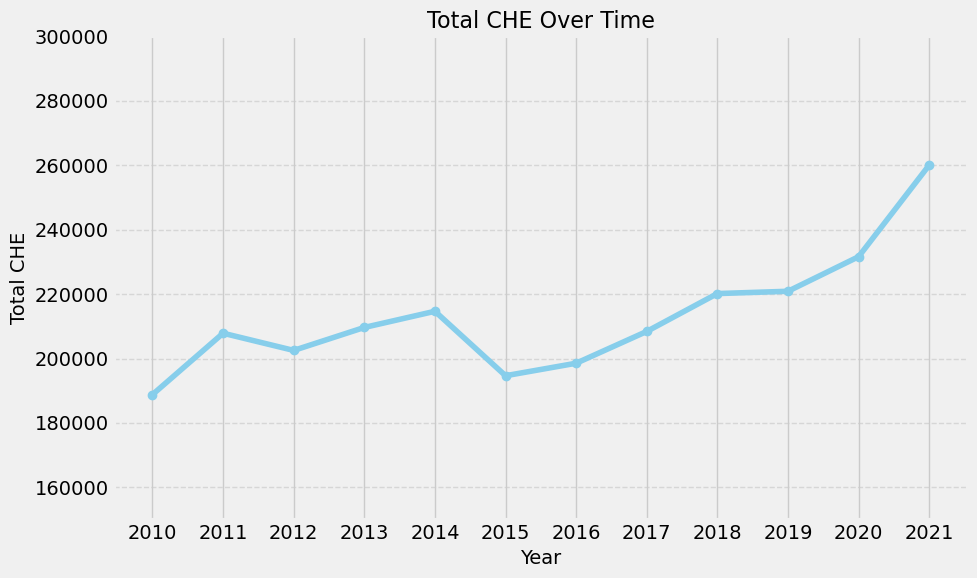

In [1007]:
# Step 8: Plotting
plt.figure(figsize=(10, 6))

# Check for 'Year' and 'CHE' in the pivoted DataFrame before plotting
if 'Year' in pivot_total_che.columns and 'CHE' in pivot_total_che.columns:
    # Create the plot
    plt.plot(pivot_total_che['Year'], pivot_total_che['CHE'], marker='o', linestyle='-', color='skyblue')
    
    # Title and labels
    plt.title('Total CHE Over Time', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Total CHE', fontsize=14)
    plt.ylim(150000, 300000)

    # Add grid for readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.xticks(pivot_total_che['Year'])  # Ensure all year ticks are shown
    plt.tight_layout()
    plt.show()
else:
    print("The required columns 'Year' or 'CHE' are missing in the pivoted DataFrame.")

### Top CHE Countries

In [974]:
# analyzing top CHE countries
top_countries_che = combined_df.groupby('Country')['CHE'].sum().nlargest(10).index

In [976]:
print(top_countries_che)

Index(['United States of America', 'Switzerland', 'Norway', 'Monaco',
       'Luxembourg', 'Denmark', 'Sweden', 'Australia',
       'Netherlands (Kingdom of the)', 'Ireland'],
      dtype='object', name='Country')


In [978]:
df_cle_top = combined_df[combined_df['Country'].isin(top_countries_che)]

In [980]:
pivot_che_df = df_cle_top.pivot(index='Year', columns='Country', values='CHE')

/var/folders/4x/r11_vgpj4glbxvp5rrk49znc0000gn/T/ipykernel_4967/3075514836.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(pivot_che_df.columns))  # 'tab10' is a color palette with distinct colors


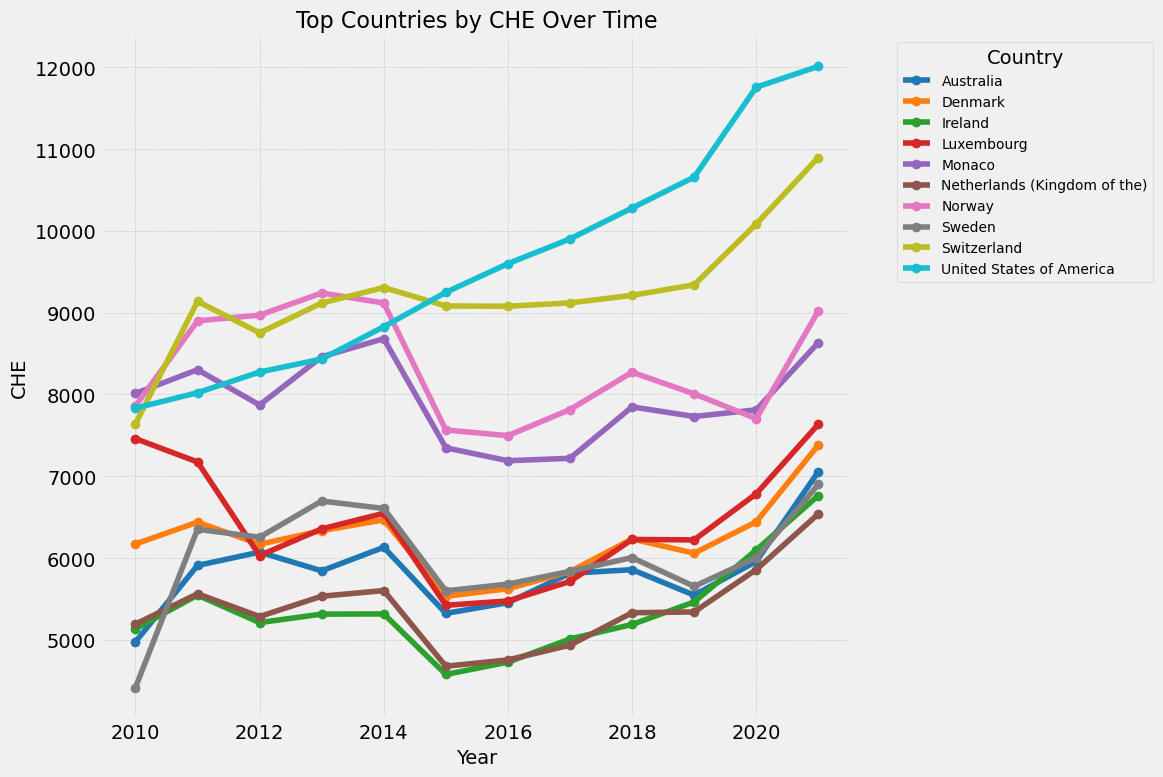

In [982]:
plt.figure(figsize=(12, 8))

# Get a colormap and set the number of colors to match the number of countries
cmap = cm.get_cmap('tab10', len(pivot_che_df.columns))  # 'tab10' is a color palette with distinct colors

# Plot each country with a unique color
for i, country in enumerate(pivot_che_df.columns):
    plt.plot(pivot_che_df.index, pivot_che_df[country], marker='o', label=country, color=cmap(i))

# Title and Axis Labels
plt.title('Top Countries by CHE Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CHE', fontsize=14)

# Legend outside of the plot for clarity
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Add grid for readability
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### HLE Overtime

In [992]:
# AVG HLE overtime 
pivot_total_hle = combined_df.pivot_table(index='Year', values='Avg HLE', aggfunc='mean').reset_index()
print("Pivoted DataFrame:\n", pivot_total_hle)

Pivoted DataFrame:
     Year    Avg HLE
0   2010  61.247598
1   2011  61.652444
2   2012  61.881788
3   2013  62.171854
4   2014  62.335000
5   2015  62.495787
6   2016  62.740791
7   2017  62.873933
8   2018  63.048146
9   2019  63.189494
10  2020  62.635674
11  2021  61.931011


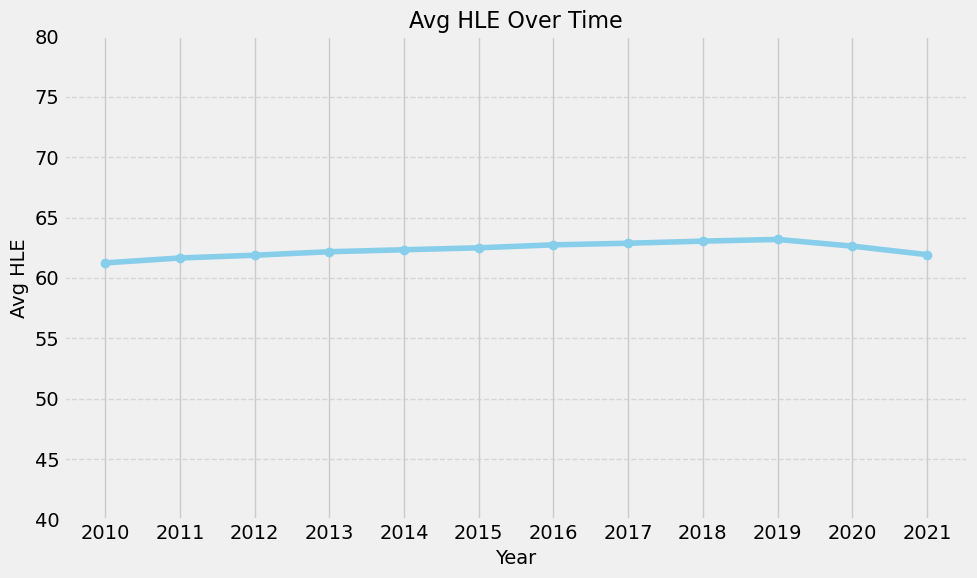

In [1005]:
# Step 8: Plotting
plt.figure(figsize=(10, 6))

# Check for 'Year' and 'CHE' in the pivoted DataFrame before plotting
if 'Year' in pivot_total_hle.columns and 'Avg HLE' in pivot_total_hle.columns:
    # Create the plot
    plt.plot(pivot_total_hle['Year'], pivot_total_hle['Avg HLE'], marker='o', linestyle='-', color='skyblue')
    
    # Title and labels
    plt.title('Avg HLE Over Time', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Avg HLE', fontsize=14)
    plt.ylim(40, 80)

    # Add grid for readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.xticks(pivot_total_hle['Year'])  # Ensure all year ticks are shown
    plt.tight_layout()
    plt.show()
else:
    print("The required columns 'Year' or 'HLE' are missing in the pivoted DataFrame.")

In [887]:
top_countries_hle = combined_df.groupby('Country')['Avg HLE'].mean().nlargest(10).index

In [889]:
print(top_countries_hle)

Index(['Japan', 'Singapore', 'Republic of Korea', 'Iceland', 'Spain', 'Israel',
       'Luxembourg', 'Switzerland', 'Italy', 'Sweden'],
      dtype='object', name='Country')


In [891]:
df_hle_top = combined_df[combined_df['Country'].isin(top_countries_hle)]

In [893]:
pivot_hle_df = df_hle_top.pivot(index='Year', columns='Country', values='Avg HLE')

/var/folders/4x/r11_vgpj4glbxvp5rrk49znc0000gn/T/ipykernel_4967/4186567132.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(pivot_hle_df.columns))  # 'tab10' is a color palette with distinct colors


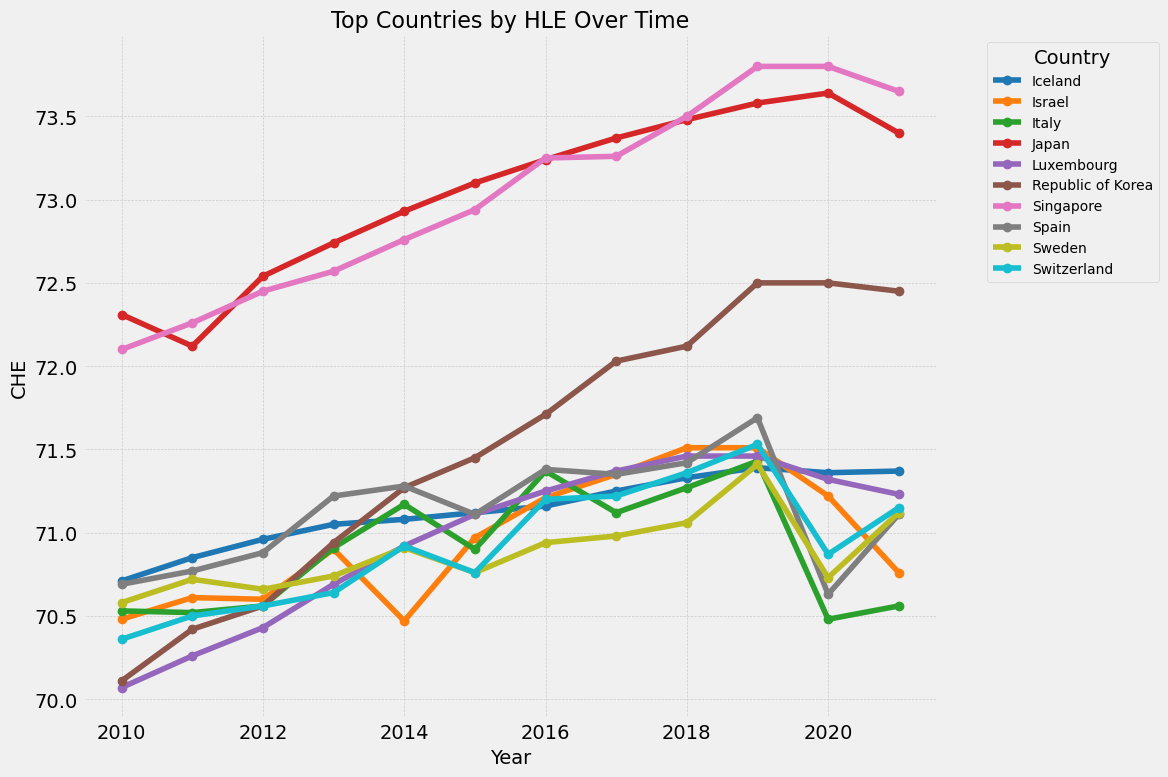

In [895]:
plt.figure(figsize=(12, 8))

# Get a colormap and set the number of colors to match the number of countries
cmap = cm.get_cmap('tab10', len(pivot_hle_df.columns))  # 'tab10' is a color palette with distinct colors

# Plot each country with a unique color
for i, country in enumerate(pivot_hle_df.columns):
    plt.plot(pivot_hle_df.index, pivot_hle_df[country], marker='o', label=country, color=cmap(i))

# Title and Axis Labels
plt.title('Top Countries by HLE Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CHE', fontsize=14)

# Legend outside of the plot for clarity
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Add grid for readability
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()